## Machine Learning 실습

### 타이타닉 탑승객 생존 예측 Classification with Python

In [1]:
# 1. 데이터 불러오기
import pandas as pd
ti = pd.read_csv('03Titanic_dataset.csv')
ti

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
ti.info()
ti.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [3]:
# 3. 빠진 값 확인
ti.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
# 4. 사용하지 않을 feature

ti = ti[['pclass', 'sibsp', 'gender', 'parch','survived', 'cabin']]

In [5]:
ti.isnull().sum()

pclass         0
sibsp          0
gender         0
parch          0
survived       0
cabin       1014
dtype: int64

In [6]:
# null값 채우기
ti = ti.fillna('unknown')
ti

,pclass,sibsp,gender,parch,survived,cabin
0,1,0,female,0,1,B5
1,1,1,male,2,1,C22 C26
2,1,1,female,2,0,C22 C26
3,1,1,male,2,0,C22 C26
4,1,1,female,2,0,C22 C26
...,...,...,...,...,...,...
1304,3,1,female,0,0,unknown
1305,3,1,female,0,0,unknown
1306,3,0,male,0,0,unknown
1307,3,0,male,0,0,unknown


In [7]:
ti.isnull().sum()

pclass      0
sibsp       0
gender      0
parch       0
survived    0
cabin       0
dtype: int64

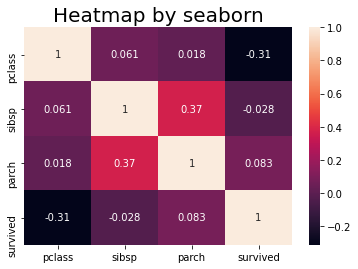

In [8]:
# 8. Feature Heatmap 시각화
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(ti.corr(), annot=True)

plt.title('Heatmap by seaborn', fontsize=20)

plt.show() 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

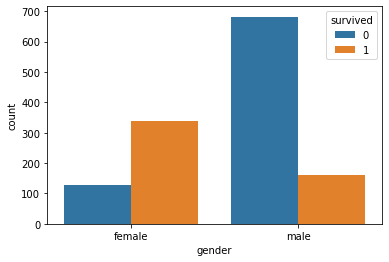

In [9]:
# 8-1. 시각화 - 성별에 따른 생존자 수
x_values = ti[['gender']]
y_values = ti[['survived']].sum()
sns.countplot('gender', hue = 'survived', data = ti)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

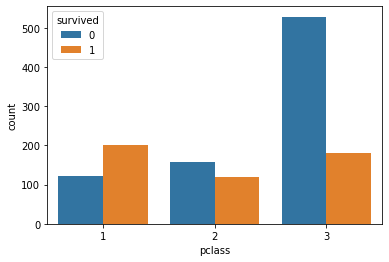

In [10]:
# 8-2 시각화 - 선실 등급에 따른 생존여부
x_values = ti[['pclass']]
y_values = ti[['survived']]
sns.countplot('pclass', hue = 'survived', data = ti)

In [11]:
# 9. X/y  분리
feature = ti.iloc[:, [0,1,2,3,5]]
label = ti.iloc[:, 4]
label

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [12]:
feature

,pclass,sibsp,gender,parch,cabin
0,1,0,female,0,B5
1,1,1,male,2,C22 C26
2,1,1,female,2,C22 C26
3,1,1,male,2,C22 C26
4,1,1,female,2,C22 C26
...,...,...,...,...,...
1304,3,1,female,0,unknown
1305,3,1,female,0,unknown
1306,3,0,male,0,unknown
1307,3,0,male,0,unknown


In [13]:
# 10. 데이터 변환(one hot encoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [2,4])], remainder='passthrough')
feature = ct.fit_transform(feature)
feature

#원핫인코딩칼럼이 앞으로 온다.


<1309x192 sparse matrix of type '<class 'numpy.float64'>'
	with 4652 stored elements in Compressed Sparse Row format>

In [14]:
feature

<1309x192 sparse matrix of type '<class 'numpy.float64'>'
	with 4652 stored elements in Compressed Sparse Row format>

In [15]:
# 11. 훈련셋/평가셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state=123)

print(X_train)
print(y_train)

  (0, 1)	1.0
  (0, 188)	1.0
  (0, 189)	3.0
  (1, 1)	1.0
  (1, 188)	1.0
  (1, 189)	3.0
  (2, 1)	1.0
  (2, 188)	1.0
  (2, 189)	3.0
  (3, 1)	1.0
  (3, 188)	1.0
  (3, 189)	2.0
  (3, 190)	1.0
  (4, 1)	1.0
  (4, 188)	1.0
  (4, 189)	3.0
  (5, 1)	1.0
  (5, 188)	1.0
  (5, 189)	3.0
  (6, 1)	1.0
  (6, 188)	1.0
  (6, 189)	3.0
  (6, 190)	1.0
  (6, 191)	1.0
  (7, 0)	1.0
  :	:
  (1040, 82)	1.0
  (1040, 189)	1.0
  (1040, 190)	3.0
  (1040, 191)	2.0
  (1041, 1)	1.0
  (1041, 109)	1.0
  (1041, 189)	1.0
  (1041, 190)	1.0
  (1042, 1)	1.0
  (1042, 188)	1.0
  (1042, 189)	3.0
  (1043, 0)	1.0
  (1043, 188)	1.0
  (1043, 189)	3.0
  (1044, 1)	1.0
  (1044, 116)	1.0
  (1044, 189)	1.0
  (1045, 1)	1.0
  (1045, 188)	1.0
  (1045, 189)	3.0
  (1046, 0)	1.0
  (1046, 179)	1.0
  (1046, 189)	3.0
  (1046, 190)	1.0
  (1046, 191)	1.0
1155    0
964     0
1127    0
406     0
919     0
       ..
1238    1
1147    0
106     0
1041    0
1122    1
Name: survived, Length: 1047, dtype: int64


In [16]:
feature

<1309x192 sparse matrix of type '<class 'numpy.float64'>'
	with 4652 stored elements in Compressed Sparse Row format>

In [56]:
# 12. 모델 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# # XGBOOST 최적 parameter 찾기
params = {
    'max_depth': [3, 5, 7], 
    'min_child_weight':[3,5,6],
    'gamma':[0, 0.001, 0.01, 0.1, 1],
    'learning_rate':[0.1, 0.05, 0.01]
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, params, n_jobs=-1, scoring='accuracy', cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_



In [33]:
# gbc parameter tuning
gbc_params = {
    'n_estimators': [100, 200, 500], 
    'learning_rate':[0.1, 0.05, 0.01, 0.02],
    'subsample' : [0.1, 0.2, 0.3],
    'min_samples_split':[2,4,6]
}
xgb = GradientBoostingClassifier()
grid_search = GridSearchCV(xgb, gbc_params, n_jobs=-1, scoring='accuracy', cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'learning_rate': 0.02,
 'min_samples_split': 4,
 'n_estimators': 500,
 'subsample': 0.3}

In [41]:
# 랜덤포레스트 parameter 찾기
rf_params = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 300], 
    'max_features' : [3,4,5],
    'min_samples_split':[2,4,6]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, rf_params, n_jobs=-1, scoring='accuracy', cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
# 보팅 앙상블
models = [
    ('XGBOOST', XGBClassifier(gamma = 0.1, learning_rate = 0.05, max_depth = 3, min_child_weight =6)),
    ('Randomforest', RandomForestClassifier(max_depth=7, max_features= 5, min_samples_split= 2, n_estimators= 300)),
    ('SVC', SVC()),
    ('GBC', GradientBoostingClassifier(learning_rate = 0.02, min_samples_split = 4, n_estimators = 500, subsample = 0.3 )),
    ('sgd', SGDClassifier(penalty='l1', random_state=0, n_jobs=-1))
]

In [89]:
vc = VotingClassifier(models, voting='hard')
vc.fit(X_train, y_train)
predicted = vc.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
# 13. 모델 성능 확인(evaluate)
# 11. Evaluate (분류모델은 mae , .,,사용 x !! )
from sklearn.metrics import accuracy_score, precision_score,recall_score

ac = accuracy_score(y_test,predicted)
pr_s = precision_score(y_test, predicted)
re = recall_score(y_test, predicted)

print('accuracy:', ac,'/precision:', pr_s,'/recall:',re)

accuracy: 0.8206106870229007 /precision: 0.8505747126436781 /recall: 0.6851851851851852


<AxesSubplot:>

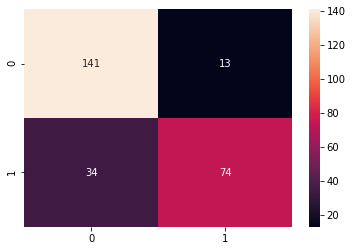

In [91]:
# 13-1. confusion matrix 확인
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True, fmt='g')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       154
           1       0.85      0.69      0.76       108

    accuracy                           0.82       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.82      0.82      0.82       262



😊